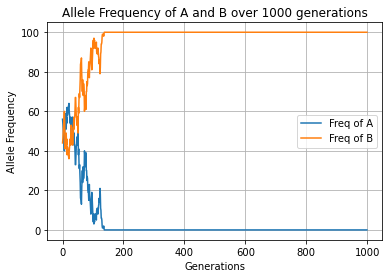

In [1]:
###Model 1:
# importing random, matplotlib and pandas modules:
import random as rnd
import pandas as pd
from pylab import *
import numpy as np

# The initial population will be modelled via a list of 50 A alleles and 50 B alleles:

# defining the population size:
popsize = 100

# initialising an empty list:
pop_array = []

# Utilising a for loop to create the list:
for i in range(0, int(popsize/2)):
    pop_array.append('A')
for i in range(int(popsize/2), popsize):
    pop_array.append('B') 

#creating a new list of weights i.e. probabilities of an allele being selected (A and B are equally likely): 
weight = list(range(0, 100))
for i in range(0, 100):
    weight[i] = 1
    
# initialising a new population list which will be modified (starting with the original population i.e. generation 1)
new_gen_pop = [None] * len(pop_array)
for i in range(0, 100):
    new_gen_pop[i] = pop_array[i]

#creating empty (1000 zeros) lists to count frequency of alleles A and B through 1000 generations
A_count = [0] * 1000 
B_count = [0] * 1000

#modelling 1000 generations via a for loop:
for i in range(0, 1000):
    #randomly (with equal probability) selecting 100 alleles from the previous generation:
    new_gen_pop = rnd.choices(new_gen_pop, weights=(weight), k=100)
    #counting frequency of individual alleles:
    if "A" in new_gen_pop:
        A_count[i] = new_gen_pop.count("A")
    if "B" in new_gen_pop:
        B_count[i] = new_gen_pop.count("B")


# creating a dataframe containing the allele frequencies of A and B over 1000 generations: 
df = pd.DataFrame({'freq_A': A_count, 'freq_B': B_count})
# plotting results:
plot(range(0,1000), df.freq_A, label = "Freq of A")
plot(range(0,1000), df.freq_B, label = "Freq of B")

# adding axes labels and title:
xlabel("Generations")
ylabel("Allele Frequency")
title("Allele Frequency of A and B over 1000 generations")
#adding in legend and grid lines:
grid(True)
legend()
show()


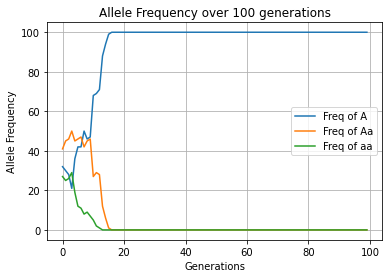

In [2]:
###Model 2:
# defining the population size:
popsize = 100

# initialising an empty list for the population:
pop_list = []

# Utilising a for loop to create the list of genotypes:
for i in range(0, int(popsize/4)):
    pop_list.append('AA')
for i in range(0, int(popsize/4)):
    pop_list.append('Aa')
for i in range(0, int(popsize/4)):
    pop_list.append('aA')  
for i in range(0, int(popsize/4)):
    pop_list.append('aa')

# creating another list with a genotype's probability of being successful i.e. AA, Aa, aA are equally likely to be successful
# aa is only 80% likely to be successful:
weight_list = []
for i in range(0, int(len(pop_list)/4)):
    weight_list.append(0.1)
for i in range(0, int(len(pop_list)/4)):
    weight_list.append(0.1)
for i in range(0, int(len(pop_list)/4)):
    weight_list.append(0.1)
for i in range(0, int(len(pop_list)/4)):
    weight_list.append(0.08)

# combining these lists into one dataframe:
df = pd.DataFrame({'genotype': pop_list, 'weight': weight_list})

# copying this original population dataframe to a new variable for manipulation:
new_pop = df.copy()


# initialising arrays to count the frequency of genotypes AA, Aa and aa through each generation (100 generations total):
freq_AA = np.array(range(0, 100))
freq_Aa = np.array(range(0, 100))
freq_aa = np.array(range(0, 100))

#defining a function that creates a new population over 1 generation:  
def one_generation_with_weight(population):
    # creating variables to count the number of each genotype in 1 generation:
    aa_count = 0
    AA_count = 0
    Aa_count = 0
    # This loop randomly picks 1 allele from a random genotype to create a new genotype (stored in the new dataframe)
    # (note, this is defined by the probabilities of a single genotype being successful)
    for i, row in new_pop.iterrows():
        new_pop.loc[i, "genotype"] = rnd.choices(new_pop.genotype, new_pop.weight)[0][1] + rnd.choices(new_pop.genotype, new_pop.weight)[0][1]
        if "aa" in new_pop.loc[i, "genotype"]:
            new_pop.loc[i, "weight"] = 0.08
        if "AA" in new_pop.loc[i, "genotype"]:
            new_pop.loc[i, "weight"] = 0.1
        if "Aa" in new_pop.loc[i, "genotype"]:
            new_pop.loc[i, "weight"] = 0.1
        if "aA" in new_pop.loc[i, "genotype"]:
            new_pop.loc[i, "weight"] = 0.1
    #this counts the frequency of each genotype in one generation
    if "aa" in list(new_pop.genotype):
        aa_count = list(new_pop.genotype).count("aa")
    if "AA" in list(new_pop.genotype):
        AA_count = list(new_pop.genotype).count("AA") 
    if "Aa" or "aA" in list(new_pop.genotype):
        Aa_count = list(new_pop.genotype).count("Aa") + list(new_pop.genotype).count("aA")
    #the function returns the genotype frequencies and the overall dataframe of genotypes and their respective successfulness
    return(aa_count, AA_count, Aa_count, new_pop)


# iterating the random process of making a new generation 100 times i.e. modelling 500 generations:
for i in range(0, 100):
    result = one_generation_with_weight(population = new_pop.genotype)
    new_pop = result[3]
    freq_aa[i] = result[0]
    freq_AA[i] = result[1]
    freq_Aa[i] = result[2]

    
# creating a dataframe containing the genotype frequencies of AA, Aa and aa over 100 generations: 
df = pd.DataFrame({'freq_AA': freq_AA, 'freq_Aa': freq_Aa, 'freq_aa': freq_aa})

# plotting each one of the genotype frequencies:
plot(range(0,100), df.freq_AA, label = "Freq of A")
plot(range(0,100), df.freq_Aa, label = "Freq of Aa")
plot(range(0,100), df.freq_aa, label = "Freq of aa")

xlabel("Generations")
ylabel("Allele Frequency")
title("Allele Frequency over 100 generations")

grid(True)
legend()
show()